# OLS Model -- PCA Dimension Reduction

Andrew Chung, hc893, 4/28/2025

Dimension Reduction through Principal Component Regression to address feature multicollinearity.

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv("subwaydata.csv").iloc[:, 1:]  # remove unlabelled index column
X = data.iloc[:, 3:]
y = np.log(data['ridership']/1000) # log-transformed
# ensure that X and y are equal in size
assert X.shape[0] == y.size, "Non-conformable X and y inputs"

## Implement PCA Regression

In [28]:
# scaling features
scaler = StandardScaler()
scaler.fit_transform(X)

# fit PCA, regression
pca = PCA(n_components = 2) # identified during EDA
X_pca = pca.fit_transform(X)
pc_cols = [f"PC{i+1}" for i in range(2)]
df_pca = pd.DataFrame(X_pca, columns=pc_cols)
ols = sm.OLS(y, sm.add_constant(df_pca)).fit()

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ridership   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.18e-37
Time:                        12:14:16   Log-Likelihood:                -170.73
No. Observations:                 184   AIC:                             347.5
Df Residuals:                     181   BIC:                             357.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9498      0.045    108.813      0.000       4.860       5.040
PC1            0.0003   1.81e-05     16.673      0.000       0.000       0.000
PC2            0.0001   7.19e-05      2.044      0.042    5.11e-06       0.000
==============================================================================
Omnibus:                        0.932   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                1.046
Skew:                           0.150   Prob(JB):                        0.593
Kurtosis:                       2.785   Cond. No.                     2.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

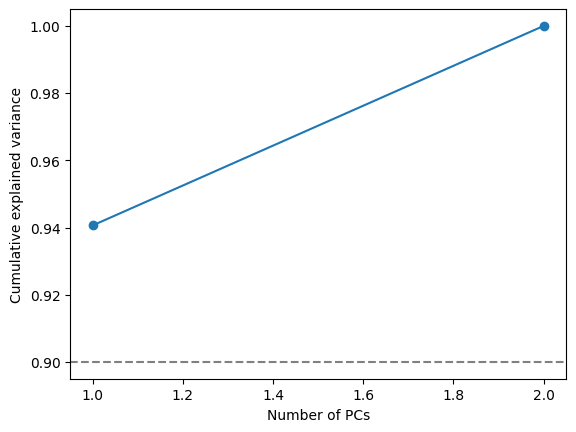

In [29]:
import matplotlib.pyplot as plt

expl_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, len(expl_var)+1), expl_var, marker='o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative explained variance')
plt.axhline(0.90, color='gray', linestyle='--')  # e.g. 90% cutoff
plt.show()

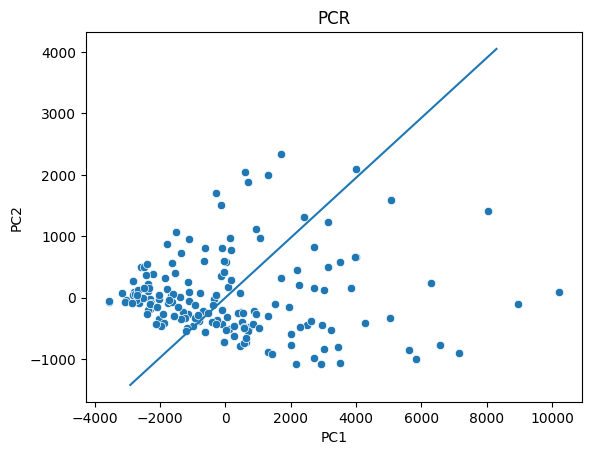

In [33]:
import seaborn as sns
# 3. Extract PC-space coefficients (skip intercept)
beta_pcs = ols.params[1:]  # [β1, β2]
u = beta_pcs / np.linalg.norm(beta_pcs)

# 5. Project scores onto this direction to get line range
t = X_pca.dot(u)
t_line = np.linspace(t.min(), t.max(), 100)
line_pts = np.outer(t_line, u)

# 6. Plot 3D scatter of PC scores + regression direction
fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1])#, X_pca[:, 2])
ax.plot(line_pts[:, 0], line_pts[:, 1])#, line_pts[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
#ax.set_zlabel('PC3')
ax.set_title('PCR')
plt.show()